In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("./  .csv")

In [6]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
scaler=MinMaxScaler(feature_range=(0,1))

In [9]:
data_scaled=scaler.fit_transform(df)

In [10]:
def create_sequence(data,seq_length):
  x,y=[],[]
  for i in range(len(data)-seq_length):
    x.append(data[i:(i+seq_length)])
    y.append(data[i+seq_length])
  return np.array(x),np.array(y)

In [11]:
seq_length=5
X,y=create_sequence(data_scaled,seq_length)

In [12]:
#split data into train-test split
size=int(0.8*len(X))
X_train,X_test=X[:size],X[size:]
y_train,y_test=y[:size],y[size:]

In [13]:
#Define the LSTM model
model=Sequential([LSTM(50,return_sequences=True,input_shape=(seq_length,1)),LSTM(50),Dense(1)])

In [14]:
model.compile(optimizer="adam",loss="mse")
model.fit(X_train,y_train,epochs=50,batch_size=16,verbose=1)

Epoch 1/50
7/7 [==============================] - 16s 12ms/step - loss: 0.0717
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0240
Epoch 3/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0179
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0144
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0118
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 7/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 8/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0092
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0089
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 11/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0087
Epoch 12/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0087
Epoch 13/50
7/7 [==============================] - 0s 12ms/s

In [15]:
predictions=model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [16]:
predictions=scaler.inverse_transform(predictions)

In [17]:
predictions

array([[434.537  ],
       [432.76926],
       [412.17795],
       [378.1969 ],
       [354.6024 ],
       [343.441  ],
       [339.3838 ],
       [353.66962],
       [368.94315],
       [384.16858],
       [407.48694],
       [446.86337],
       [478.76862],
       [476.536  ],
       [453.2577 ],
       [419.64987],
       [401.6198 ],
       [393.82507],
       [388.5291 ],
       [393.27304],
       [410.07288],
       [425.4471 ],
       [452.74762],
       [498.32596],
       [527.7141 ],
       [517.89636],
       [492.57117],
       [452.51154]], dtype=float32)

In [18]:
y_test=scaler.inverse_transform(y_test)

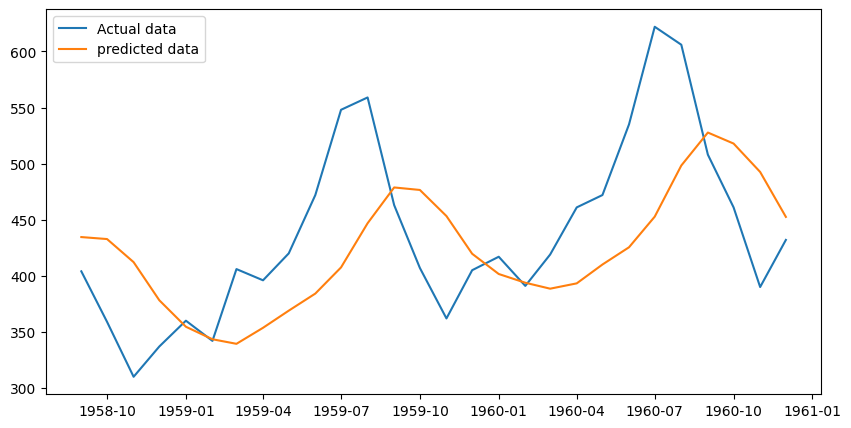

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):],y_test,label="Actual data")
plt.plot(df.index[-len(y_test):],predictions,label="predicted data")
plt.legend()
plt.show()